In [1]:
%matplotlib inline

# to plot the inferred maps, run step 0. and then go to the last cell


In [2]:
# step 0. parameters

### no windowing, diffusivity and potential, not regularized ###

## data

trajectory_file = 'trajectories_2.txt' # from WT/2/folder_130425_22h_C03

## tessellation

# cell size
resolution = .025 # in um
# minimum number of locations per cell
nb_min = 20

## inference

localization_error = 0.03 # in um
diffusivity_smoothing = potential_smoothing = 0.
jeffreys_prior = False
max_iter = 50



from tramway.helper import *
from tramway.helper.simulation import *
import os.path
import random
import numpy as np
import time


rwa_file = os.path.splitext(trajectory_file)[0]+'.rwa'

mesh_label = 'grid_{}nm_nb_min_{}'.format(int(round(resolution * 1e3)), nb_min)

maps_label = 'sigma_{}_d_{:.0f}_v_{:.0f}_j_{:d}'.format(int(round(localization_error * 1e3)), diffusivity_smoothing, potential_smoothing, int(jeffreys_prior))


In [3]:
# step 2. tessellate

tessellate(rwa_file if os.path.exists(rwa_file) else trajectory_file,
        'grid', ref_distance=resolution, rel_avg_distance=1., min_location_count=0,
        knn=nb_min, label=mesh_label, force=False)

# notes: grid cell size is driven by two parameters:
#        the desired (average) inter-cell distance and the minimum number of locations per cell;
#        to control the inter-cell distance, `min_location_count` must be set to 0 so that this parameter
#        does not impact the cell size.
#
#        by default the (average) inter-cell distance is set as twice `ref_distance`;
#        this factor 2 is the "relative average distance" `rel_avg_distance` that can be set to 1 instead.
#
#        cells with less than 20 (`nb_min`) locations are enlarged up to 20 nearest neighbours with `knn`.

# answer `y` only if the mesh is actually new;
# beware that all the related inferences will be lost


overwrite file 'trajectories_2.rwa': [N/y] 


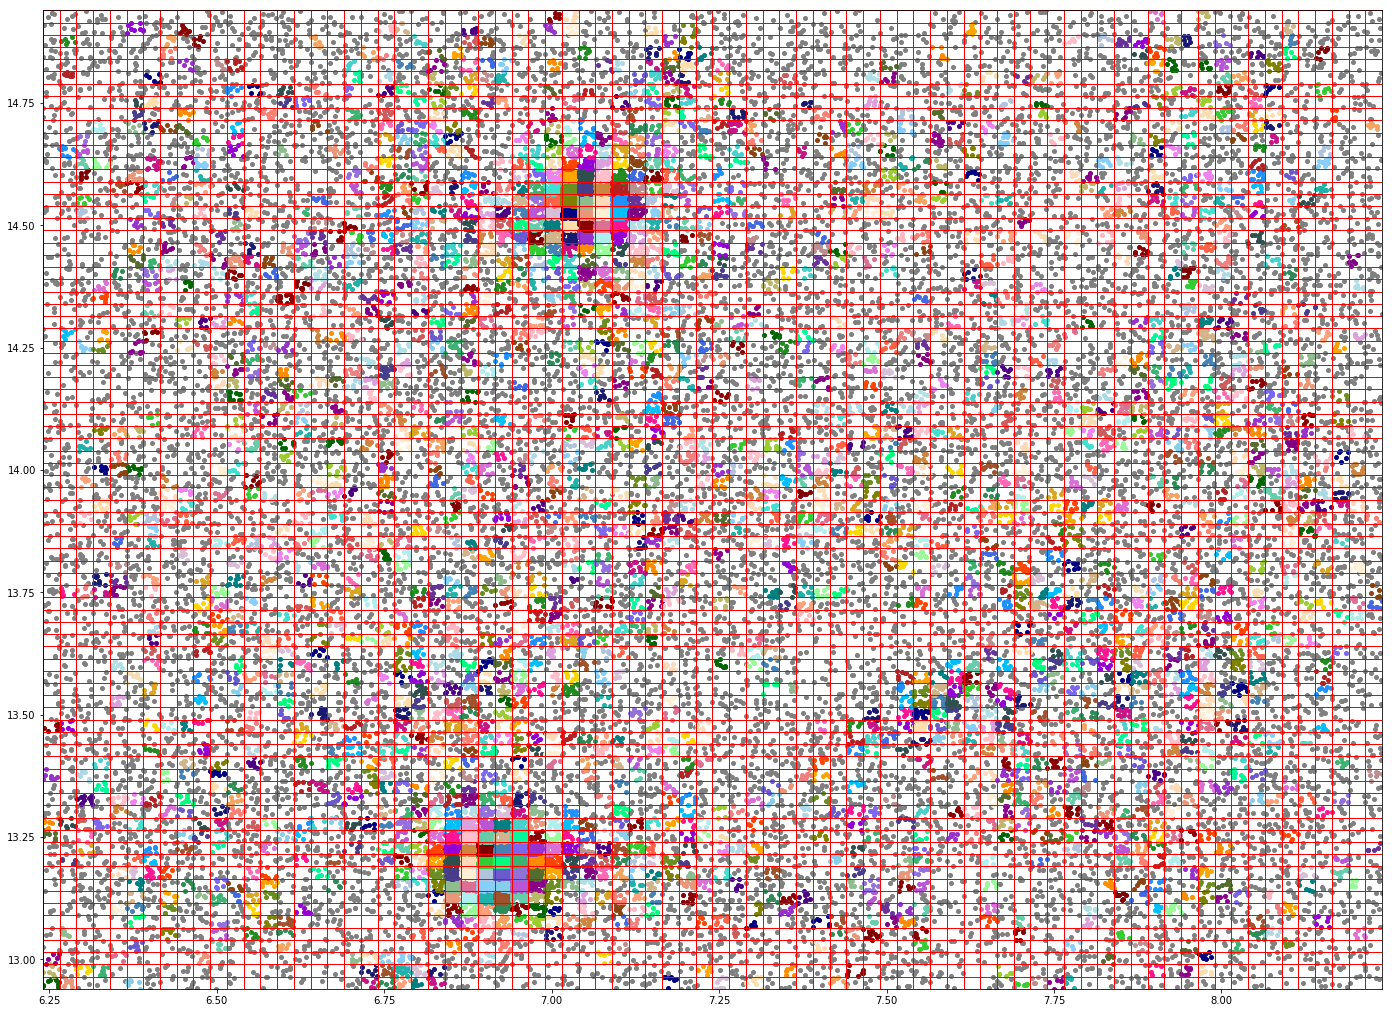

In [13]:
# plot the mesh from the rwa file

cell_plot(rwa_file, label=mesh_label, voronoi=dict(centroid_style=None))


In [ ]:
# step 3. infer D and V

t0 = time.time()

infer(rwa_file, 'DV', max_iter=max_iter,
     localization_error=localization_error,
     diffusivity_prior=diffusivity_smoothing,
     potential_prior=potential_smoothing,
     jeffreys_prior=jeffreys_prior,
     input_label=mesh_label, output_label=maps_label)

# take holidays

print('elapsed time: {:d}s'.format(round(time.time()-t0)))

/home/francois/github/TRamWAy/tramway/inference/dv.py:210: RuntimeWarning: cannot properly initialize energy potentials
  warn('cannot properly initialize energy potentials', RuntimeWarning)


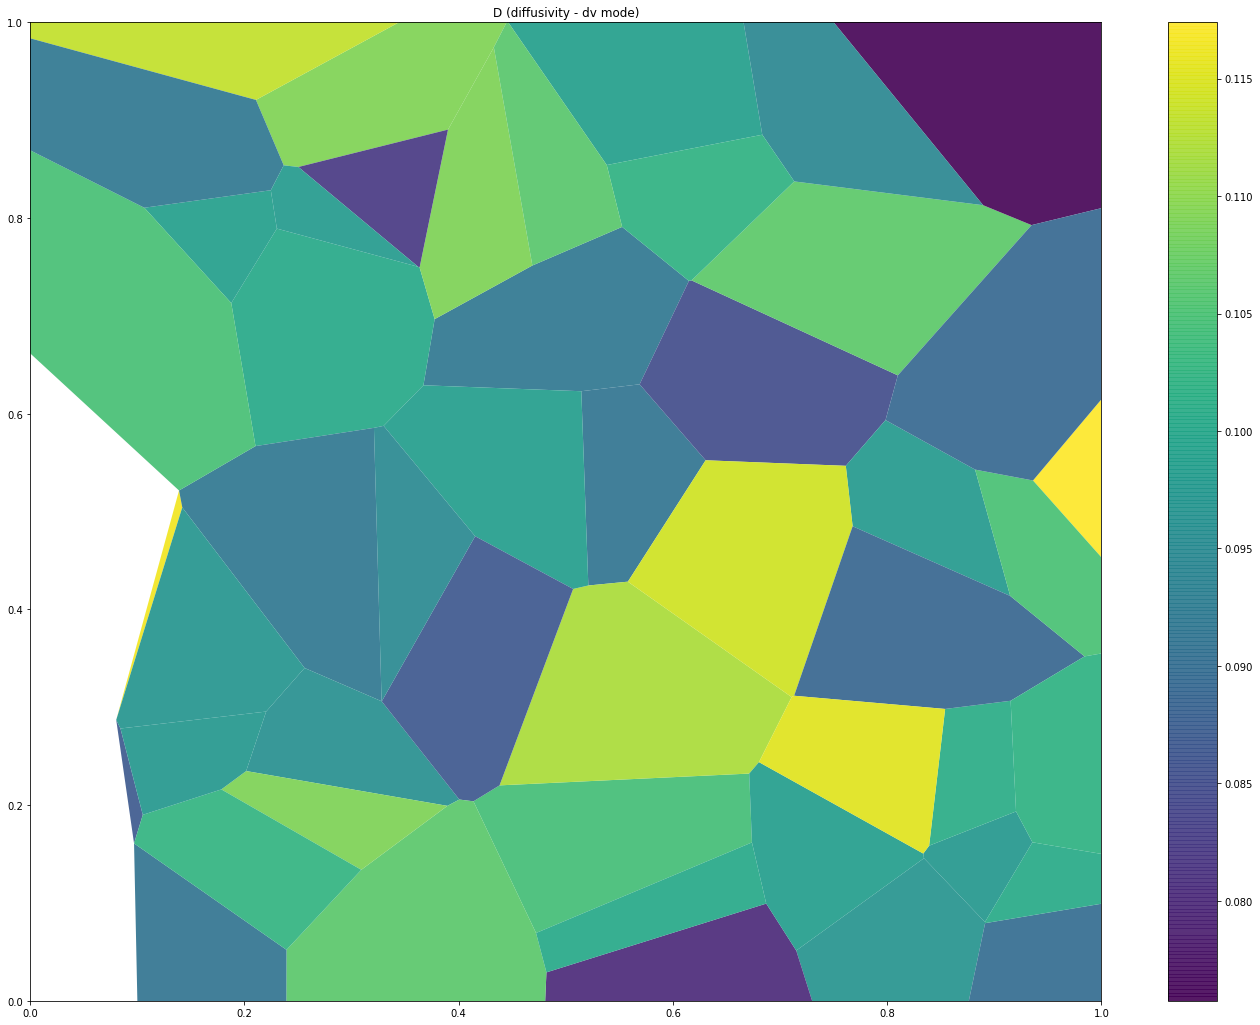

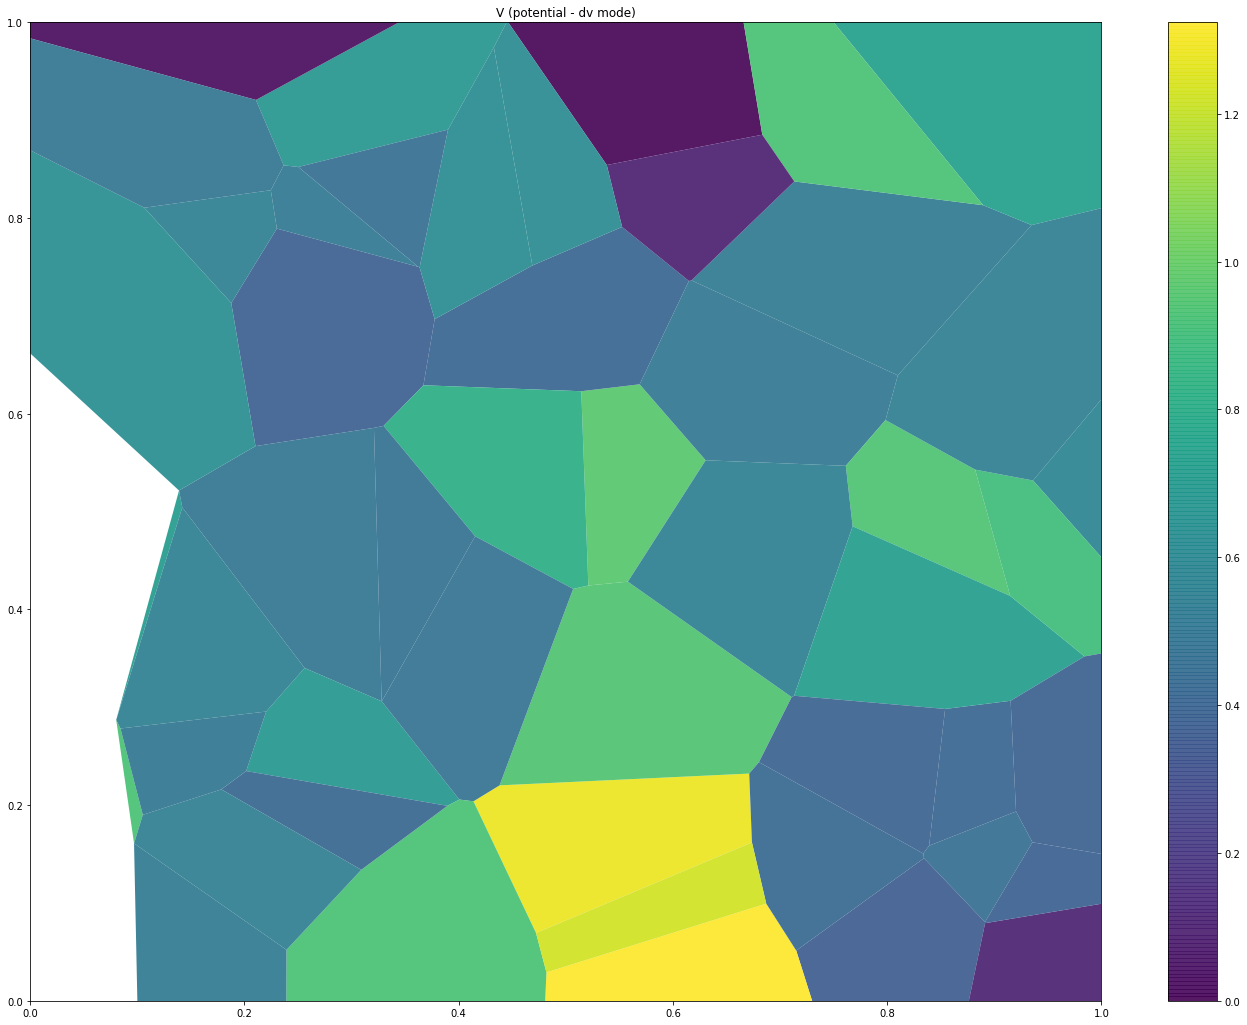

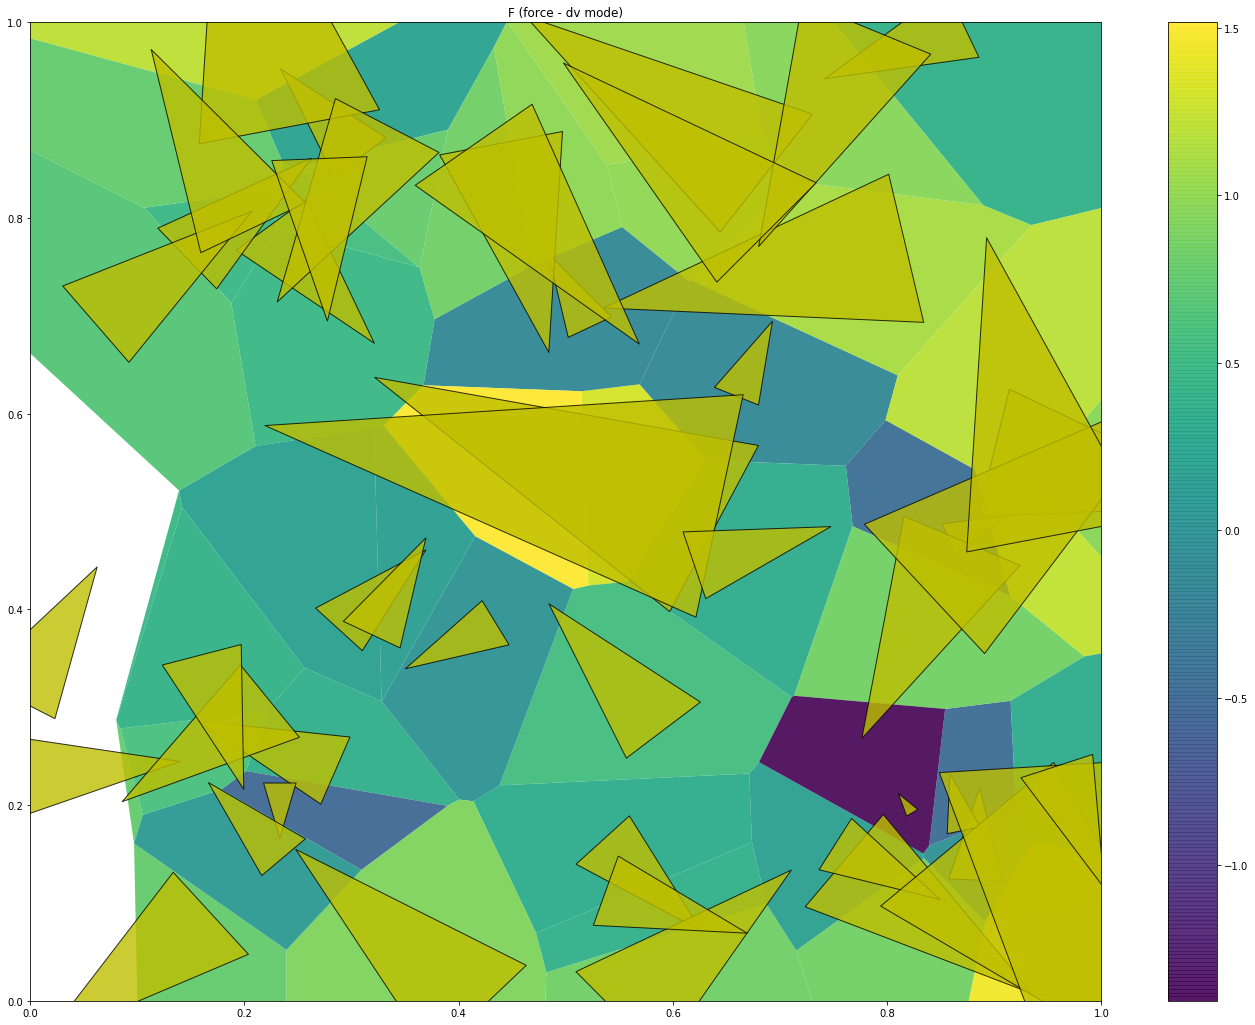

In [7]:
# plot the maps

map_plot(rwa_file, label=(mesh_label, maps_label))

# note: the colour-coded map for the force is the log-amplitude